# Computing $T_{eff}$ for EBTEL-2fluid Runs: Emission from Electron and Ion Heating Cases

In [1]:
import sys
from imp import reload
from scipy.optimize import curve_fit
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/wtb2/Documents/sunFM/')
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
import ebtel_run as tf_run
import ebtel_plot as ebp
import ebtel_wrapper as sf_wrap
import em_binner as emb
reload(emb)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'em_binner' from '/home/wtb2/Documents/sunFM/em_binner.py'>

We will compute emission measure distributions for sample EBTEL runs for $L=40$ Mm, $T_N=5000$ s, $\alpha=-2.5$, $\beta=1$, for electron, ion, and single-fluid heating cases.

First, we need to replace the `print_plasma_params` option in the XML files. Then, we will compute each of the EBTEL runs. Finally, we will compute $T_{eff}$ using the `Ion_Pop_Solver` code and construct emission measure distributions for both $T$ and $T_{eff}$.

Change files so that all parameters will be printed.

In [2]:
#electron file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
#ion file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
#single file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')

Now, run the code.

In [3]:
tf_runner = tf_run.Runner('/home/wtb2/Documents/EBTEL-2fluid_repo/bin/',
                         '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/')
tf_runner.run_ebtel_single('ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
tf_runner.run_ebtel_single('ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
sf_wrap.run_ebtel('/home/wtb2/Documents/EBTEL_C/bin/',
                 '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/',
                 config_file='ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)						
			   Two-fluid Model											
************************************************************************************

Original single-fluid code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Heating species: electron
Solving equations using adaptive fourth order Runge-Kutta routine
Using Raymond-Klimchuk Loss Function
Using l

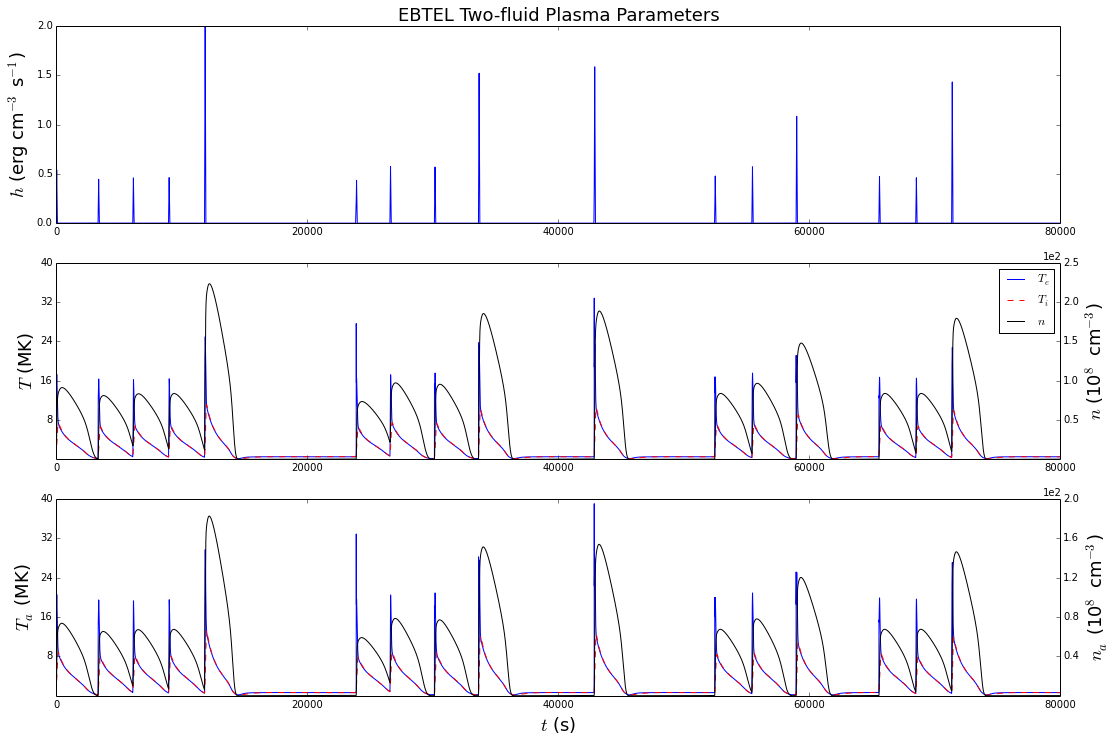

In [21]:
#Plot profiles
plotter = ebp.Plotter(parent_dir='ebtel_data/',child='ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron')
plotter.plot_params()

Read in the data and print to files to be read by `Ion_Pop_Solver` code.

In [27]:
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.txt')
np.savetxt('ebtel_data/electron_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,3]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.txt')
np.savetxt('ebtel_data/ion_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,3]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.txt')
np.savetxt('ebtel_data/single_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,2]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')

Run the `Ion_Pop_Solver` code for the three sets of $n(t),T(t)$ profiles (external).

First, look at the resulting temperature and density profiles for the three cases.

Now that we've run the $T_{eff}$ code to take into account non-equilibrium ionization, let's plot $T_{eff}$ and compare to $T$ for the three cases.

In [3]:
def tick_maker(old_ticks,n):
    if n < 2:
        raise ValueError('n must be greater than 1')
        
    n = n-1
    delta = (old_ticks[-1] - old_ticks[0])/n
    new_ticks = []
    for i in range(n):
        new_ticks.append(old_ticks[0] + i*delta)
        
    new_ticks.append(old_ticks[0] + n*delta)
    return new_ticks

def ion_pop_t_plotter(filename):
    #load file
    data = np.loadtxt(filename)
    #get relevant data
    t = data[:,0]
    T = data[:,1]
    Teff = data[:,2]
    n = data[:,3]
    #calculate difference between temperatures
    tteff_eps = T-Teff
    
    #set up figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    #plot
    line_tteff_eps = ax.plot(t,tteff_eps,color='k',linestyle='-',
                             label=r'$\epsilon_{T}$')
    ax_n = ax.twinx()
    line_n = ax_n.plot(t,n,label=r'$n$',color='k',linestyle='--')
    #labels
    ax.set_ylabel(r'$T_{eff}-T$',fontsize=22)
    ax.set_xlabel(r'$t$',fontsize=22)
    ax_n.set_ylabel(r'$n$',fontsize=22)
    #legend
    lines = line_n + line_tteff_eps 
    labels = [l.get_label() for l in lines]
    ax.legend(lines,labels,loc='best',fontsize=0.65*22)
    #aesthetics
    ax.set_xticks(tick_maker(ax.get_xticks(),5))
    ax.set_yticks(tick_maker(ax.get_yticks(),5))
    ax_n.set_yticks(tick_maker(ax_n.get_yticks(),5))
    ax.tick_params(axis='both',labelsize=0.65*22,pad=8)
    ax_n.tick_params(axis='both',labelsize=0.65*22,pad=8)
    #show or print
    plt.show()

Now, let's calculate the $\mathrm{EM}$ distributions using both $T$ and $T_{eff}$ for our three cases.

Define a mini fitter function so that we can quickly fit the hot and cool slopes.

In [4]:
def mini_fitter(logT,logEM,cool_lims=[6.0,6.6],cutoff=23.0):
    #Interpolate
    inf_index = np.where(logEM > cutoff)
    logT_new = np.linspace(logT[inf_index[0][0]],logT[inf_index[0][-1]],
                          2000)
    logEM_new = np.interp(logT_new,logT[inf_index[0][0]:inf_index[0][-1]],
                         logEM[inf_index[0][0]:inf_index[0][-1]])
    #Find hot limits
    i_hot = np.where(logT_new > logT_new[np.argmax(logEM_new)])[0]
    logEM_hot = logEM_new[i_hot]
    logT_hot = logT_new[i_hot]
    hot_lims = [logT_new[i_hot[np.where(logEM_hot>0.99*np.max(logEM_new))[0]][-1]],
               logT_new[i_hot[np.where(logEM_hot>0.92*np.max(logEM_new))[0]][-1]]]
    #Get cool and hot arrays
    #cool
    icl = np.where(logT_new<cool_lims[0])
    icu = np.where(logT_new>cool_lims[-1])
    if len(icl[0]) > 0 and len(icu[0]) > 0:
        logT_new_cool = logT_new[(icl[0][-1] + 1):(icu[0][0] - 1)]
        logEM_new_cool = logEM_new[(icl[0][-1] + 1):(icu[0][0] - 1)]
    else:
        logT_new_cool = False
        logEM_new_cool = False
    #hot
    ihl = np.where(logT_new<hot_lims[0])
    ihu = np.where(logT_new>hot_lims[-1])
    if len(ihl[0]) > 0 and len(ihu[0]) > 0:
        logT_new_hot = logT_new[(ihl[0][-1] + 1):(ihu[0][0] - 1)]
        logEM_new_hot = logEM_new[(ihl[0][-1] + 1):(ihu[0][0] - 1)]
    else:
        logT_new_hot = False
        logEM_new_hot = False
    #define linear function to fit to
    def linear_fit(x,a,b):
        return a*x + b
    #do linear fit
    #cool
    if logT_new_cool is False:
        ac = False
        bc = False
    else:
        pars,covar = curve_fit(linear_fit,logT_new_cool,logEM_new_cool)
        ac,bc = pars[0],pars[1]
    #hot
    if logT_new_hot is False:
        ah = False
        bh = False
    else:
        pars,covar = curve_fit(linear_fit,logT_new_hot,logEM_new_hot)
        ah,bh = pars[0],pars[1]
        
    #return temperature vectors and fit parameters
    return logT_new_cool,[ac,bc],logT_new_hot,[ah,bh]

In [5]:
def plot_derivs(logT,logEM,logEM_eff,**kwargs):
    #regular
    i_filter = np.where(logEM>23.0)
    logEM_cleaned = np.array(logEM[i_filter[0]])
    logT_cleaned = np.array(logT[i_filter[0]])
    dEMdT = np.gradient(logEM_cleaned,np.gradient(logT_cleaned))
    #effective
    i_filter = np.where(logEM_eff>23.0)
    logEM_cleaned_eff = np.array(logEM_eff[i_filter[0]])
    logT_cleaned_eff = np.array(logT[i_filter[0]])
    dEMdT_eff = np.gradient(logEM_cleaned_eff,np.gradient(logT_cleaned_eff))
    #plotting
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    ax.plot(logT_cleaned,dEMdT,'-k',label=r'$T$')
    ax.plot(logT_cleaned_eff,dEMdT_eff,'--k',label=r'$T_{eff}$')
    #labels
    ax.set_xlabel(r'$\log{T}$ $\mathrm{(K)}$',fontsize=22)
    ax.set_ylabel(r'$d\log{\mathrm{EM}}/d\log{T}$',fontsize=22)
    ax.axhline(y=2,color='k',linestyle=':')
    ax.axhline(y=3,color='k',linestyle=':')
    ax.axhline(y=-2.5,color='k',linestyle=':')
    ax.axhline(y=-5.5,color='k',linestyle=':')
    #styling
    ax.set_ylim([-10,6])
    ax.set_xlim([5.5,7.5])
    ax.set_yticks(tick_maker(ax.get_yticks(),5))
    ax.tick_params(axis='both',pad=8,labelsize=0.65*22)
    #legend
    ax.legend(loc='best',fontsize=0.65*22)
    #show or save
    plt.tight_layout()
    if 'fn' in kwargs:
        plt.savefig(kwargs['fn'],format='pdf',dpi=1000)
    else:
        plt.show()

Use $\mathrm{EM}$ values for $T$ and $T_{eff}$ to do fits to both sets of emission measure curves for all three example cases.

/home/wtb2/Documents/sunFM/em_binner.py:75: RuntimeWarning: divide by zero encountered in log10
  self.em = np.log10(np.average(em_mat,axis=0,weights=np.gradient(self.time)))
/home/wtb2/Documents/sunFM/em_binner.py:76: RuntimeWarning: divide by zero encountered in log10
  self.em_eff = np.log10(np.average(em_eff_mat,axis=0,weights=np.gradient(self.time)))


Temperature bins not yet created. Building now with default values.


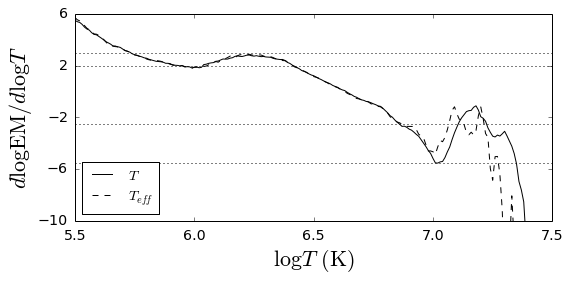

In [6]:
#electron
binner = emb.EM_Binner('ebtel_data/teff_electron_ebtel.txt',2*40.0e+8)
binner.build_em_dist()
#derivatives
plot_derivs(binner.logT_EM,binner.em,binner.em_eff,
           fn='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_electron_derivs.pdf')
#fitting
logTc,pc,logTh,ph = mini_fitter(binner.logT_EM,binner.em)
logTc_eff,pc_eff,logTh_eff,ph_eff = mini_fitter(binner.logT_EM,
                                                binner.em_eff)

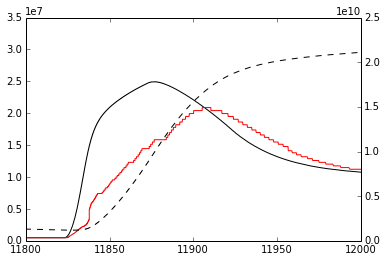

In [23]:
ax = plt.figure().gca()
ax.plot(binner.time,binner.temp,'k')
ax.plot(binner.time,binner.temp_eff,'r')
ax.twinx().plot(binner.time,binner.density,'--k')
ax.set_xlim([11800,12000])
#ax.twinx().set_xlim([500,2000])
plt.show()

/home/wtb2/Documents/sunFM/em_binner.py:75: RuntimeWarning: divide by zero encountered in log10
  self.em = np.log10(np.average(em_mat,axis=0,weights=np.gradient(self.time)))
/home/wtb2/Documents/sunFM/em_binner.py:76: RuntimeWarning: divide by zero encountered in log10
  self.em_eff = np.log10(np.average(em_eff_mat,axis=0,weights=np.gradient(self.time)))


Temperature bins not yet created. Building now with default values.


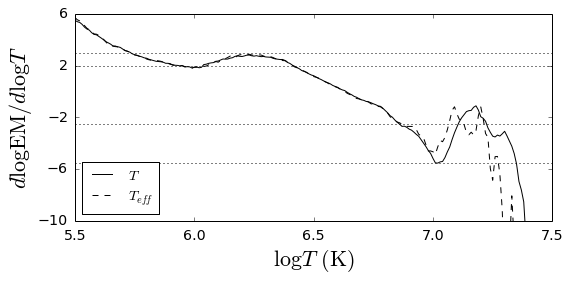

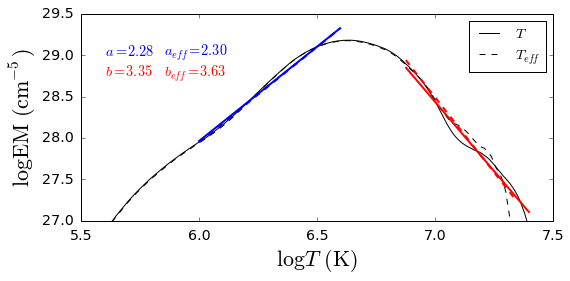

In [29]:
#plotting
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
#plot EM curves
ax.plot(binner.logT_EM,binner.em,'k',label=r'$T$')
ax.plot(binner.logT_EM,binner.em_eff,'--k',label=r'$T_{eff}$')
#plot fit lines
if logTc is not False:
    ax.plot(logTc,pc[0]*logTc+pc[1],'b',linewidth=2)
if logTh is not False:
    ax.plot(logTh,ph[0]*logTh+ph[1],'r',linewidth=2)
if logTc_eff is not False:
    ax.plot(logTc_eff,pc_eff[0]*logTc_eff+pc_eff[1],'--b',linewidth=2)
if logTh_eff is not False:
    ax.plot(logTh_eff,ph_eff[0]*logTh_eff+ph_eff[1],'--r',linewidth=2)
#limits
ax.set_xlim([5.5,7.5])
ax.set_ylim([27,29.5])
#print slope values
ax.annotate(r'$a=%.2f$'%(pc[0]),
           xy=(5.6,29.0),fontsize=0.65*22,color='b')
ax.annotate(r'$a_{eff}=%.2f$'%(pc_eff[0]),
           xy=(5.85,29.0),fontsize=0.65*22,color='b')
ax.annotate(r'$b=%.2f$'%np.fabs(ph[0]),
           xy=(5.6,28.75),fontsize=0.65*22,color='r')
ax.annotate(r'$b_{eff}=%.2f$'%np.fabs(ph_eff[0]),
           xy=(5.85,28.75),fontsize=0.65*22,color='r')
#labels and aesthetics
ax.tick_params(axis='both',labelsize=0.65*22,pad=8)
ax.set_xlabel(r'$\log{T}$ $\mathrm{(K)}$',fontsize=22)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ $(\mathrm{cm}^{-5})$',fontsize=22)
ax.legend(loc='best',fontsize=0.65*22)
#show and print
plt.tight_layout()
plt.savefig('/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_electron_em.pdf',
           format='pdf',dpi=1000)
plt.show()

/home/wtb2/Documents/sunFM/em_binner.py:75: RuntimeWarning: divide by zero encountered in log10
  self.em = np.log10(np.average(em_mat,axis=0,weights=np.gradient(self.time)))
/home/wtb2/Documents/sunFM/em_binner.py:76: RuntimeWarning: divide by zero encountered in log10
  self.em_eff = np.log10(np.average(em_eff_mat,axis=0,weights=np.gradient(self.time)))


Temperature bins not yet created. Building now with default values.


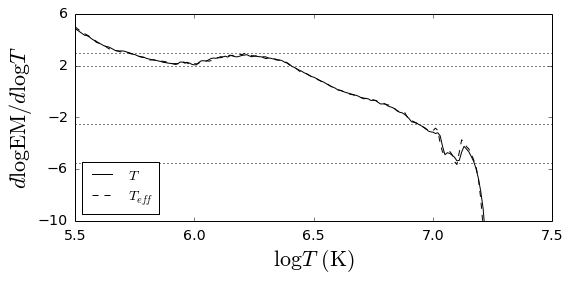

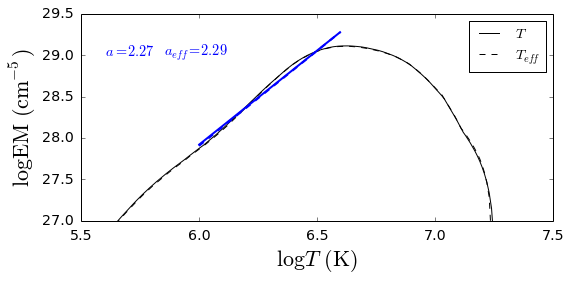

In [30]:
#ion
binner = emb.EM_Binner('ebtel_data/teff_ion_ebtel.txt',2*40.0e+8)
binner.build_em_dist()
#derivatives
plot_derivs(binner.logT_EM,binner.em,binner.em_eff,fn='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_ion_derivs.pdf')
#fitting
logTc,pc,logTh,ph = mini_fitter(binner.logT_EM,binner.em)
logTc_eff,pc_eff,logTh_eff,ph_eff = mini_fitter(binner.logT_EM,
                                                binner.em_eff)
#plotting
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
#plot EM curves
ax.plot(binner.logT_EM,binner.em,'k',label=r'$T$')
ax.plot(binner.logT_EM,binner.em_eff,'--k',label=r'$T_{eff}$')
#plot fit lines
if logTc is not False:
    ax.plot(logTc,pc[0]*logTc+pc[1],'b',linewidth=2)
if logTh is not False:
    ax.plot(logTh,ph[0]*logTh+ph[1],'r',linewidth=2)
if logTc_eff is not False:
    ax.plot(logTc_eff,pc_eff[0]*logTc_eff+pc_eff[1],'--b',linewidth=2)
if logTh_eff is not False:
    ax.plot(logTh_eff,ph_eff[0]*logTh_eff+ph_eff[1],'--r',linewidth=2)
#limits
ax.set_xlim([5.5,7.5])
ax.set_ylim([27,29.5])
#print slope values
ax.annotate(r'$a=%.2f$'%(pc[0]),
           xy=(5.6,29.0),fontsize=0.65*22,color='b')
ax.annotate(r'$a_{eff}=%.2f$'%(pc_eff[0]),
           xy=(5.85,29.0),fontsize=0.65*22,color='b')
#labels and aesthetics
ax.tick_params(axis='both',labelsize=0.65*22,pad=8)
ax.set_xlabel(r'$\log{T}$ $\mathrm{(K)}$',fontsize=22)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ $(\mathrm{cm}^{-5})$',fontsize=22)
ax.legend(loc='best',fontsize=0.65*22)
#show and print
plt.tight_layout()
plt.savefig('/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_ion_em.pdf',
           format='pdf',dpi=1000)
plt.show()

/home/wtb2/Documents/sunFM/em_binner.py:75: RuntimeWarning: divide by zero encountered in log10
  self.em = np.log10(np.average(em_mat,axis=0,weights=np.gradient(self.time)))
/home/wtb2/Documents/sunFM/em_binner.py:76: RuntimeWarning: divide by zero encountered in log10
  self.em_eff = np.log10(np.average(em_eff_mat,axis=0,weights=np.gradient(self.time)))


Temperature bins not yet created. Building now with default values.


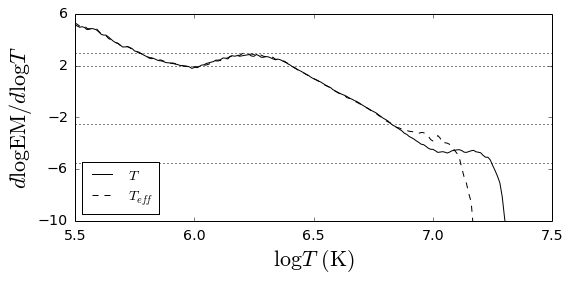

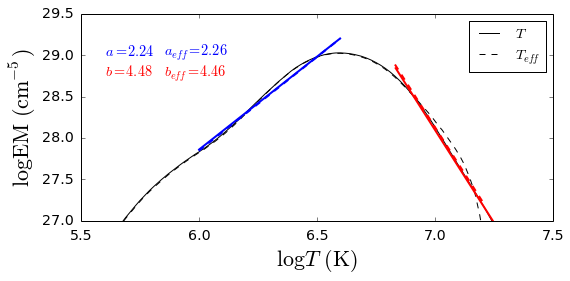

In [31]:
#single
binner = emb.EM_Binner('ebtel_data/teff_single_ebtel.txt',2*40.0e+8)
binner.build_em_dist()
#derivatives
plot_derivs(binner.logT_EM,binner.em,binner.em_eff,
           fn='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_single_derivs.pdf')
#fitting
logTc,pc,logTh,ph = mini_fitter(binner.logT_EM,binner.em)
logTc_eff,pc_eff,logTh_eff,ph_eff = mini_fitter(binner.logT_EM,
                                                binner.em_eff)
#plotting
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
#plot EM curves
ax.plot(binner.logT_EM,binner.em,'k',label=r'$T$')
ax.plot(binner.logT_EM,binner.em_eff,'--k',label=r'$T_{eff}$')
#plot fit lines
if logTc is not False:
    ax.plot(logTc,pc[0]*logTc+pc[1],'b',linewidth=2)
if logTh is not False:
    ax.plot(logTh,ph[0]*logTh+ph[1],'r',linewidth=2)
if logTc_eff is not False:
    ax.plot(logTc_eff,pc_eff[0]*logTc_eff+pc_eff[1],'--b',linewidth=2)
if logTh_eff is not False:
    ax.plot(logTh_eff,ph_eff[0]*logTh_eff+ph_eff[1],'--r',linewidth=2)
#limits
ax.set_xlim([5.5,7.5])
ax.set_ylim([27,29.5])
#print slope values
ax.annotate(r'$a=%.2f$'%(pc[0]),
           xy=(5.6,29.0),fontsize=0.65*22,color='b')
ax.annotate(r'$a_{eff}=%.2f$'%(pc_eff[0]),
           xy=(5.85,29.0),fontsize=0.65*22,color='b')
ax.annotate(r'$b=%.2f$'%np.fabs(ph[0]),
           xy=(5.6,28.75),fontsize=0.65*22,color='r')
ax.annotate(r'$b_{eff}=%.2f$'%np.fabs(ph_eff[0]),
           xy=(5.85,28.75),fontsize=0.65*22,color='r')
#labels and aesthetics
ax.tick_params(axis='both',labelsize=0.65*22,pad=8)
ax.set_xlabel(r'$\log{T}$ $\mathrm{(K)}$',fontsize=22)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ $(\mathrm{cm}^{-5})$',fontsize=22)
ax.legend(loc='best',fontsize=0.65*22)
#show and print
plt.tight_layout()
plt.savefig('/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/teff_single_em.pdf',
           format='pdf',dpi=1000)
plt.show()

For comparison purposes, make temperature, density, and heating profiles for three cases.

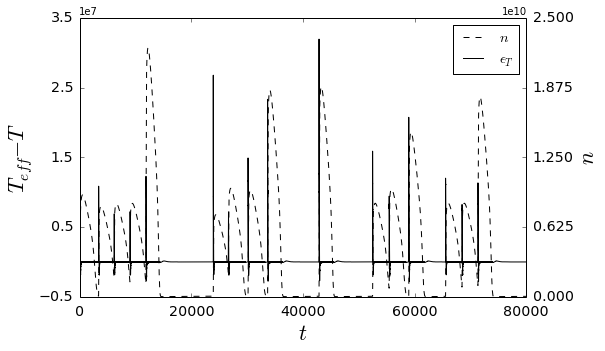

In [37]:
ion_pop_t_plotter('ebtel_data/teff_electron_ebtel.txt')

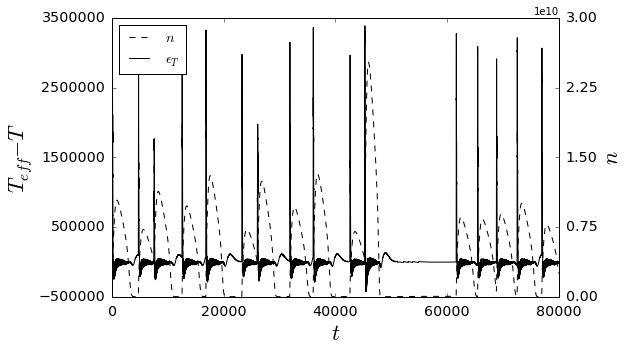

In [38]:
ion_pop_t_plotter('ebtel_data/teff_ion_ebtel.txt')

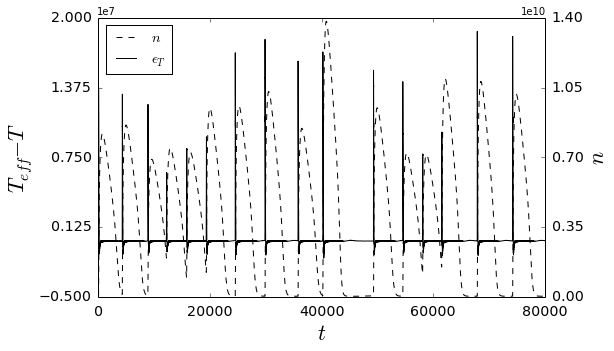

In [39]:
ion_pop_t_plotter('ebtel_data/teff_single_ebtel.txt')